In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [22]:

test_Binary = pd.read_csv('/home/leandro/Documentos/Organizacion de datos/Fiuba-Big-Data-Analytics-TPs/Tp 2/Datos/TestBinaryEncoding.csv')

train_Binary = pd.read_csv('/home/leandro/Documentos/Organizacion de datos/Fiuba-Big-Data-Analytics-TPs/Tp 2/Datos/TrainBinaryEncoding.csv')

#Aparece una columna que no tengo idea de donde salio, de momento la voy a eliminar

train_Binary = train_Binary.drop(["Unnamed: 0"], axis=1) 
test_Binary = test_Binary.drop(["Unnamed: 0"], axis=1) 

# the strongest relationship with the output variable.

In [23]:
X = train_Binary.drop(['Stage'], axis=1) 
y = train_Binary[['Stage']] 


#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                            Specs         Score
223          Total_Taxable_Amount  1.211377e+10
222                  Total_Amount  1.090746e+10
224                            ID  6.976629e+04
232                           TRF  3.820374e+04
230                Opportunity_ID  6.219981e+03
220                           ASP  4.385103e+03
14            Bureaucratic_Code_2  1.375353e+03
123                    Currency_1  1.160821e+03
99                        Brand_4  1.147851e+03
113          Product_Category_B_4  1.025932e+03
120                       Price_5  1.016853e+03
103                Product_Type_2  9.857252e+02
107                        Size_2  7.769071e+02
102                Product_Type_1  5.226937e+02
106                        Size_1  5.058327e+02
227  Bureaucratic_Code_0_Approval  4.203129e+02
15            Bureaucratic_Code_3  4.164710e+02
111          Product_Category_B_2  3.657559e+02
42                 Account_Name_2  3.497980e+02
112          Product_Category_B_3  3.450

In [25]:
featureScores

,Specs,Score
0,Region_0,NaN
1,Region_1,0.244170
2,Region_2,9.843957
3,Region_3,56.631177
4,Territory_0,NaN
...,...,...
228,Bureaucratic_Code_0_Approved,33.175384
229,Submitted_for_Approval,NaN
230,Opportunity_ID,6219.980723
231,Delivery_Year,0.000130


# Extra Tree Classifier, Feature importance 

<ipython-input-26-664012bd4b97>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


[0.00000000e+00 2.96451821e-03 6.08895141e-03 5.15148388e-03
 0.00000000e+00 1.10357905e-03 1.48748363e-03 4.01736942e-03
 4.73131804e-03 4.64781842e-03 5.85917837e-03 5.51964721e-03
 0.00000000e+00 1.74290329e-03 3.07110009e-02 3.15560083e-02
 0.00000000e+00 3.41042040e-03 6.84406594e-03 7.97952941e-03
 5.15401041e-03 5.32178504e-03 4.38271397e-03 4.87257504e-03
 5.58559858e-03 7.46635715e-03 5.49602586e-03 0.00000000e+00
 1.32532830e-03 3.51589238e-03 4.77633486e-03 4.71106592e-03
 0.00000000e+00 2.20609486e-04 1.29383862e-03 4.20825284e-03
 3.55334458e-03 4.87379830e-03 3.58858880e-03 1.42393794e-02
 0.00000000e+00 3.85616699e-03 7.96438543e-03 8.81029950e-03
 5.90430432e-03 5.70897010e-03 5.36825583e-03 5.05600362e-03
 5.25033619e-03 5.26819056e-03 6.12619407e-03 5.27394664e-03
 0.00000000e+00 1.43493369e-03 4.74213195e-03 5.28921778e-03
 6.59833146e-03 5.44965812e-03 6.33170121e-03 0.00000000e+00
 3.01243469e-03 5.20323420e-03 7.55278423e-03 6.02493347e-03
 4.95391013e-03 8.646593

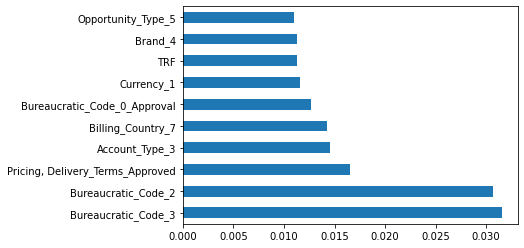

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [31]:
feat_importances.nlargest(10)

Bureaucratic_Code_3                 0.031556
Bureaucratic_Code_2                 0.030711
Pricing, Delivery_Terms_Approved    0.016483
Account_Type_3                      0.014547
Billing_Country_7                   0.014239
Bureaucratic_Code_0_Approval        0.012704
Currency_1                          0.011627
TRF                                 0.011331
Brand_4                             0.011266
Opportunity_Type_5                  0.010966
dtype: float64

# Correlation Matrix with Heatmap

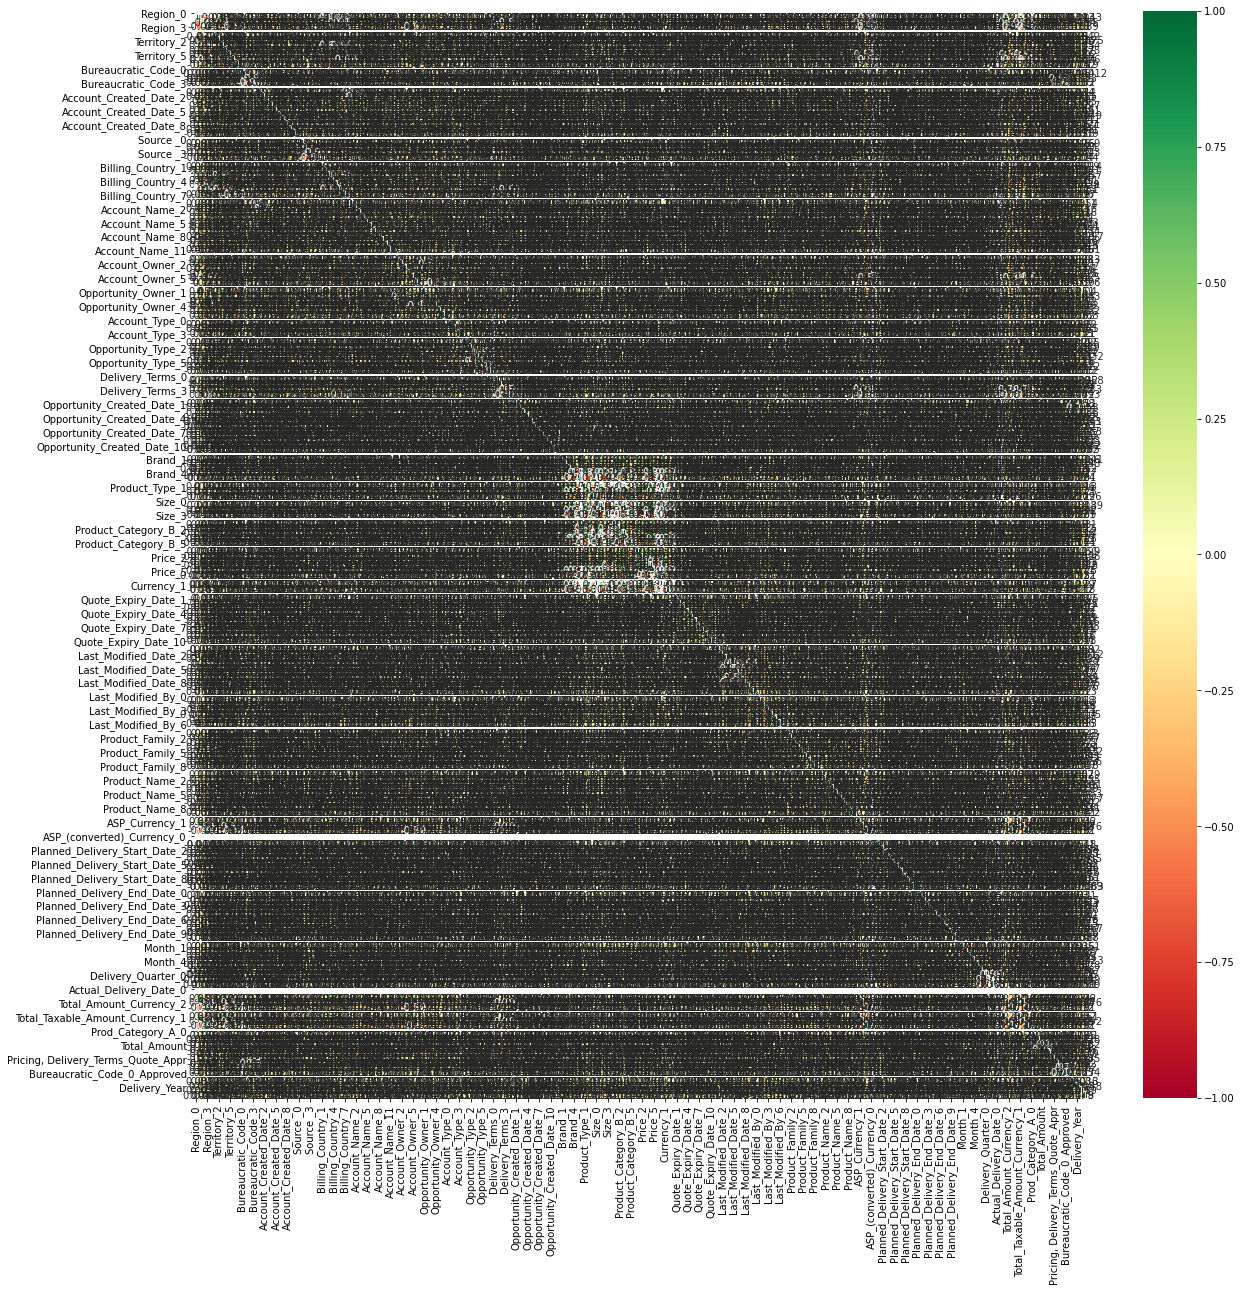

In [29]:
import seaborn as sns

corrmat = train_Binary.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_Binary[top_corr_features].corr(),annot=True,cmap="RdYlGn")

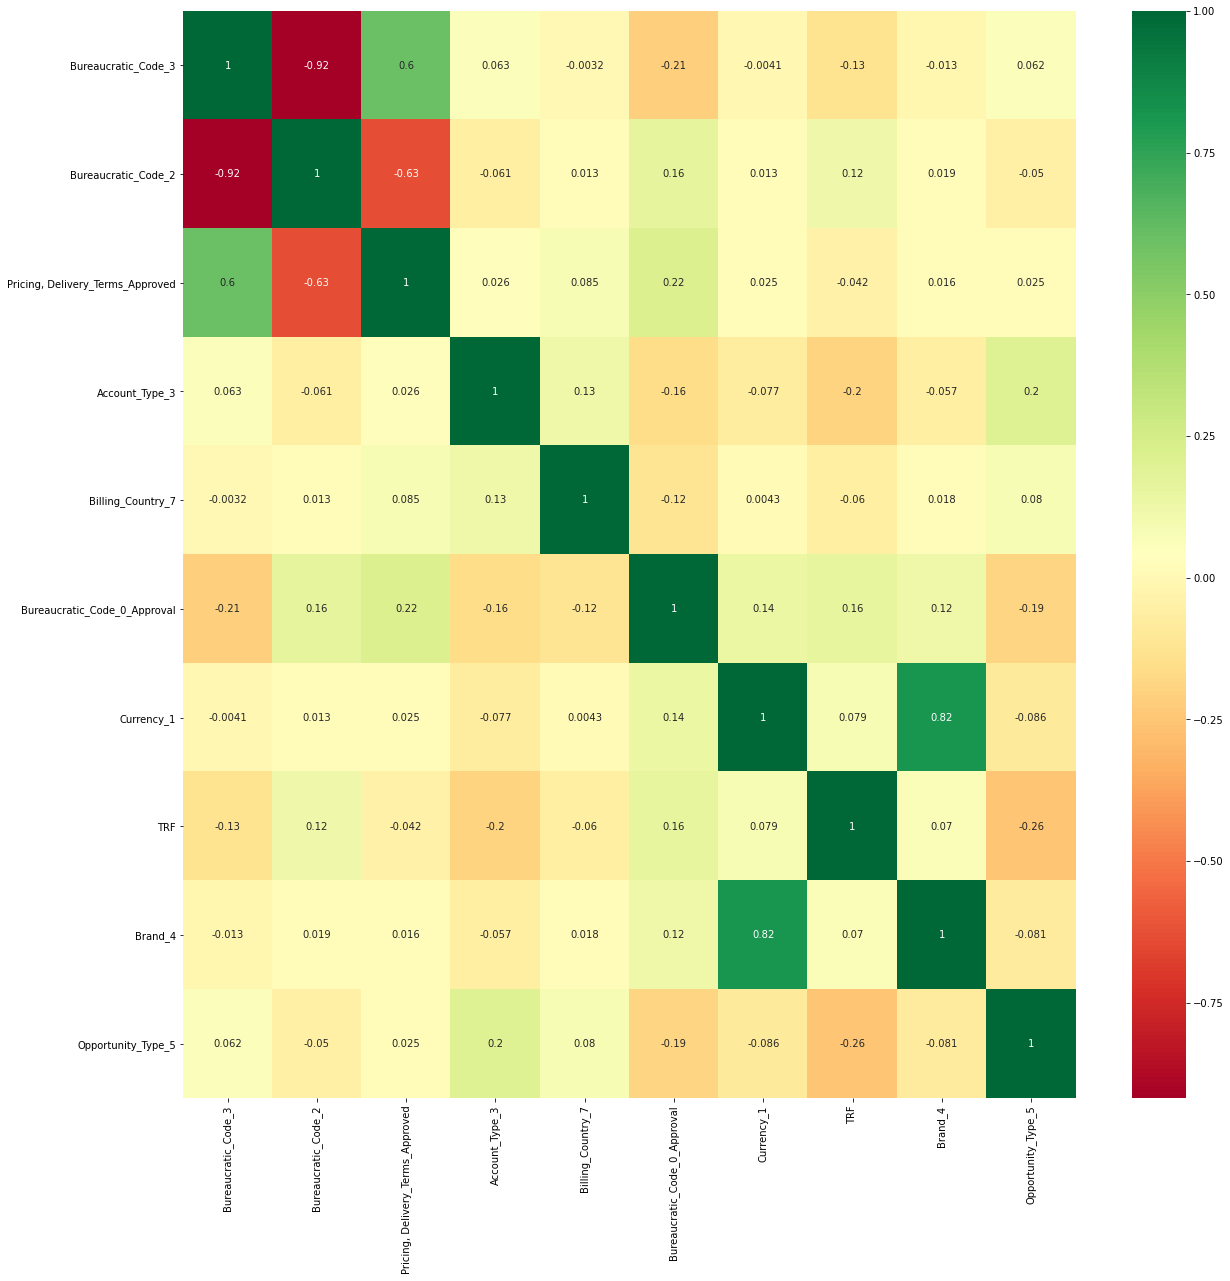

In [37]:
#Bueno como no se ve nada en el anterior, voy a realizar lo mimso pero con los 10 features calculados antes
corrmat = train_Binary[feat_importances.nlargest(10).index].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_Binary[top_corr_features].corr(),annot=True,cmap="RdYlGn")